# Agenda
* Numpy
* Pandas
* Lab


# Introduction


## Create a new notebook for your code-along:

From our submission directory, type:
    
    jupyter notebook

From the IPython Dashboard, open a new notebook.
Change the title to: "Numpy and Pandas"

# Introduction to Numpy

* Overview
* ndarray
* Indexing and Slicing

More info: [http://wiki.scipy.org/Tentative_NumPy_Tutorial](http://wiki.scipy.org/Tentative_NumPy_Tutorial)


## Numpy Overview

* Why Python for Data? Numpy brings *decades* of C math into Python!
* Numpy provides a wrapper for extensive C/C++/Fortran codebases, used for data analysis functionality
* NDAarray allows easy vectorized math and broadcasting (i.e. functions for vector elements of different shapes)

In [ ]:
import numpy as np

### Creating ndarrays

An array object represents a multidimensional, homogeneous array of fixed-size items. 

In [ ]:
# Creating arrays
a = np.zeros((3))
b = np.ones((2,3))
c = np.random.randint(1,10,(2,3,4))
d = np.arange(0,11,1)

What are these functions?

    arange?

In [ ]:
# Note the way each array is printed:
a,b,c,d

In [ ]:
## Arithmetic in arrays is element wise

In [ ]:
a = np.array( [20,30,40,50] )
b = np.arange( 4 )
b

In [ ]:
c = a-b
c

In [ ]:
b**2

## Indexing, Slicing and Iterating

In [ ]:
# one-dimensional arrays work like lists:
a = np.arange(10)**2

In [ ]:
a

In [ ]:
a[2:5]

In [ ]:
# Multidimensional arrays use tuples with commas for indexing
# with (row,column) conventions beginning, as always in Python, from 0

In [ ]:
b = np.random.randint(1,100,(4,4))

In [ ]:
b

In [ ]:
# Guess the output
print(b[2,3])
print(b[0,0])


In [ ]:
b[0:3,1],b[:,1]

In [ ]:
b[1:3,:]

# Introduction to Pandas

* Object Creation
* Viewing data
* Selection
* Missing data
* Grouping
* Reshaping
* Time series
* Plotting
* i/o
 

_pandas.pydata.org_

## Pandas Overview

_Source: [pandas.pydata.org](http://pandas.pydata.org/pandas-docs/stable/10min.html)_

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dates = pd.date_range('20140101',periods=6)
dates

In [ ]:
df = pd.DataFrame(np.random.randn(6,4),index=dates,columns=list('ABCD'))
z = pd.DataFrame(index = df.index, columns = df.columns)
df.columns

In [ ]:
# Index, columns, underlying numpy data
df.T
df

In [ ]:
df2 = pd.DataFrame({ 'A' : 1.,
                         'B' : pd.Timestamp('20130102'),
                         'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                         'D' : np.array([3] * 4,dtype='int32'),
                         'E' : 'foo' })
    

df2

In [ ]:
# With specific dtypes
df2.dtypes

#### Viewing Data

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.index

In [ ]:
df.describe()

In [ ]:
df.sort_values(by='B')
df

### Selection

In [ ]:
df[['A','B']]

In [ ]:
df[0:3]

In [ ]:
# By label
df.loc[dates[0]]

In [ ]:
# multi-axis by label
df.loc[:,['A','B']]

In [ ]:
# Date Range
df.loc['20140102':'20140104',['B']]

In [ ]:
# Fast access to scalar
df.at[dates[1],'B']

In [ ]:
# iloc provides integer locations similar to np style
df.iloc[3:]

### Boolean Indexing

In [ ]:
df[df.A < 0] # Basically a 'where' operation

### Setting

In [ ]:
df_posA = df.copy() # Without "copy" it would act on the dataset

df_posA[df_posA.A < 0] = -1*df_posA

In [ ]:
df_posA

In [ ]:
#Setting new column aligns data by index
s1 = pd.Series([1,2,3,4,5,6],index=pd.date_range('20140102',periods=6))

In [ ]:
s1

In [ ]:
df['F'] = s1

In [ ]:
df

### Missing Data

In [ ]:
# Add a column with missing data
df1 = df.reindex(index=dates[0:4],columns=list(df.columns) + ['E'])

In [ ]:
df1.loc[dates[0]:dates[1],'E'] = 1

In [ ]:
df1

In [ ]:
# find where values are null
pd.isnull(df1)

### Operations

In [ ]:
df.describe()

In [ ]:
df.mean(),df.mean(1) # Operation on two different axes

### Applying functions

In [ ]:
df

In [ ]:
df.apply(np.cumsum)

In [ ]:
df.apply(lambda x: x.max() - x.min())

In [ ]:
# Built in string methods
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

### Merge

In [ ]:
np.random.randn(10,4)

In [ ]:
#Concatenating pandas objects together
df = pd.DataFrame(np.random.randn(10,4))
df

In [ ]:
# Break it into pieces
pieces = [df[:3], df[3:7],df[7:]]
pieces

In [ ]:
pd.concat(pieces)

In [ ]:
# Also can "Join" and "Append"
df

### Grouping


In [ ]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar',
                       'foo', 'bar', 'foo', 'foo'],
                       'B' : ['one', 'one', 'two', 'three',
                             'two', 'two', 'one', 'three'],
                       'C' : np.random.randn(8),
                       'D' : np.random.randn(8)})

In [ ]:
df

In [ ]:
df.groupby(['A','B']).sum()

### Reshaping

In [ ]:
# You can also stack or unstack levels

In [ ]:
a = df.groupby(['A','B']).sum()

In [ ]:
# Pivot Tables
pd.pivot_table(df,values=['C','D'],index=['A'],columns=['B'])

### Time Series


In [1]:
import pandas as pd
import numpy as np

In [2]:
# 100 Seconds starting on January 1st
rng = pd.date_range('1/1/2014', periods=100, freq='S')

In [3]:
# Give each second a random value
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

In [4]:
ts

2014-01-01 00:00:00     65
2014-01-01 00:00:01    395
2014-01-01 00:00:02    481
2014-01-01 00:00:03    434
2014-01-01 00:00:04    311
2014-01-01 00:00:05    102
2014-01-01 00:00:06     16
2014-01-01 00:00:07     61
2014-01-01 00:00:08    253
2014-01-01 00:00:09    149
2014-01-01 00:00:10    302
2014-01-01 00:00:11    292
2014-01-01 00:00:12    304
2014-01-01 00:00:13    417
2014-01-01 00:00:14    406
2014-01-01 00:00:15    235
2014-01-01 00:00:16    118
2014-01-01 00:00:17    365
2014-01-01 00:00:18    267
2014-01-01 00:00:19    124
2014-01-01 00:00:20    377
2014-01-01 00:00:21     41
2014-01-01 00:00:22     23
2014-01-01 00:00:23     10
2014-01-01 00:00:24    317
2014-01-01 00:00:25     19
2014-01-01 00:00:26    304
2014-01-01 00:00:27    415
2014-01-01 00:00:28    292
2014-01-01 00:00:29    233
                      ... 
2014-01-01 00:01:10     59
2014-01-01 00:01:11    496
2014-01-01 00:01:12    272
2014-01-01 00:01:13    148
2014-01-01 00:01:14    281
2014-01-01 00:01:15    310
2

In [5]:
# Built in resampling
ts.resample('1Min').mean() # Resample secondly to 1Minutely

2014-01-01 00:00:00    256.70
2014-01-01 00:01:00    249.65
Freq: T, dtype: float64

In [ ]:
# Many additional time series features
ts. #use tab

### Plotting


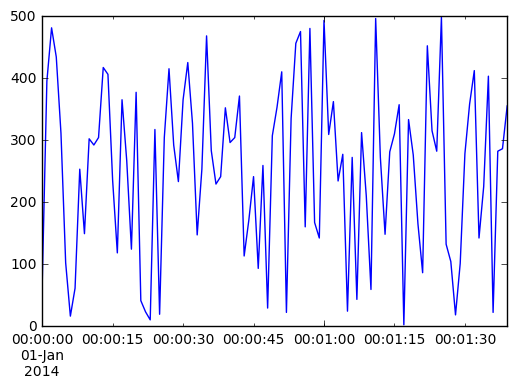

In [8]:
ts.plot()

In [9]:
def randwalk(startdate,points):
    ts = pd.Series(np.random.randn(points), index=pd.date_range(startdate, periods=points))
    ts=ts.cumsum()
    ts.plot()
    return(ts)

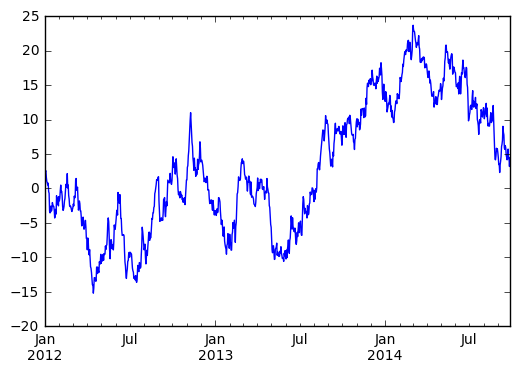

In [10]:
# Using pandas to make a simple random walker by repeatedly running:
a=randwalk('1/1/2012',1000)

In [17]:
# Pandas plot function will print with labels as default
import matplotlib.pyplot as plt
%matplotlib inline

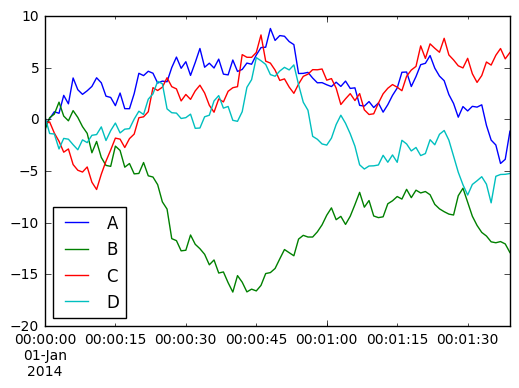

In [18]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index,columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure();df.plot();plt.legend(loc='best') #

### I/O
I/O is straightforward with, for example, pd.read_csv or df.to_csv

#### The benefits of open source:

Let's look under x's in plt modules

# Next Steps

**Recommended Resources**

Name | Description
--- | ---
[Official Pandas Tutorials](http://pandas.pydata.org/pandas-docs/stable/10min.html) | Wes & Company's selection of tutorials and lectures
[Julia Evans Pandas Cookbook](https://github.com/jvns/pandas-cookbook) | Great resource with examples from weather, bikes and 311 calls
[Learn Pandas Tutorials](https://bitbucket.org/hrojas/learn-pandas) | A great series of Pandas tutorials from Dave Rojas
[Research Computing Python Data PYNBs](https://github.com/ResearchComputing/Meetup-Fall-2013/tree/master/python) | A super awesome set of python notebooks from a meetup-based course exclusively devoted to pandas